**Transfer Learning**


* Keras contains pretrained models for image classification which are trained on Imagenet data. 
* Imagenet is a large collection of image data containing 1000 categories of images. 
* These pretrained models are capable of classifying any image that falls into these 1000 categories of images.

In [1]:
dataset_path = 'output_images/'

In [2]:
seed_value = 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import cv2

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)


import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

**Load the Data**

In [3]:
# lists to hold data

images = []
labels = []

In [4]:
# listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['candle', 'car', 'cat', 'circle', 'house']

In [5]:
# Creating dictionaries to map folder names
count = 0
name_mapping_dict = dict()

for folder_name in folders:
  name_mapping_dict[folder_name] = count
  count += 1


name_mapping_dict

{'candle': 0, 'car': 1, 'cat': 2, 'circle': 3, 'house': 4}

In [6]:
inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'candle', 1: 'car', 2: 'cat', 3: 'circle', 4: 'house'}


In [7]:
# Setting image size
img_size = 150

**Pre-process dataset**

In [8]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')

  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labels.append(name_mapping_dict[folder])

Processing folder: candle
Processing folder: car
Processing folder: cat
Processing folder: circle
Processing folder: house


In [9]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [10]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (10000, 150, 150, 3)
labels shape :  (10000,)


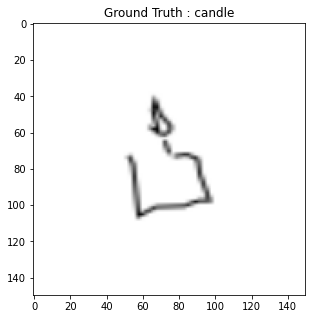

In [11]:
# Plotting samples from data to check if data has been read successfully
img_number = 65
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

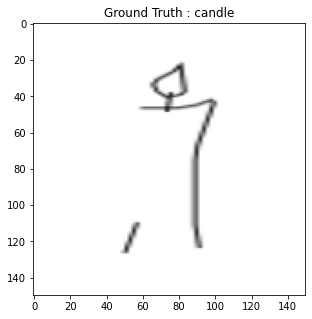

In [12]:
# Plotting samples from data to check if data has been read successfully
img_number = 705
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

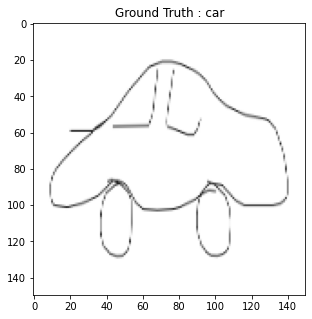

In [13]:
# Plotting samples from data to check if data has been read successfully
img_number = 2105
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

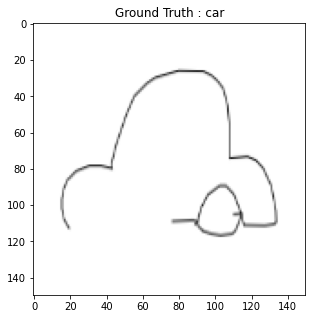

In [14]:
# Plotting samples from data to check if data has been read successfully
img_number = 3400
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [15]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [16]:
# Normalize training image pixels
images = np.array(images) / 255

In [17]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [18]:
labels[3305]

1

In [19]:
labels_one_hot[3305]

array([0., 1., 0., 0., 0.], dtype=float32)

**Shuffling and Splittng Dataset**

In [20]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.20, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (8000, 150, 150, 3) (8000, 5)
Testing data shape :  (2000, 150, 150, 3) (2000, 5)


**Design the Network Architecure for Convolutional Neural Network**


* Getting a pretrained Feature Extractor
* Removing its Fully-Connected layers and attaching our own (To exclude the default classifier we have to set argument include_top to false)

Attaching our own classifier

In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

"""
Pre-trained model examples are as follows:


pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
"""

pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(classes_num, activation="softmax"))



**Configure the model training time parameters**

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [72]:
history = model.fit(train_images, train_labels, batch_size=64,  epochs=1, verbose=1, 
                   validation_data=(test_images, test_labels))

125/125 [==============================] - 106s 846ms/step - loss: 0.3025 - accuracy: 0.9015 - val_loss: 0.3639 - val_accuracy: 0.8745


**Evaluate the Trained Model on Testing Data**

In [71]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss, test_acc*100))

63/63 [==============================] - 22s 354ms/step - loss: 0.2744 - accuracy: 0.9135
Evaluation result on Test Data : Loss = 0.27438536286354065, accuracy = 91.35000109672546%


In [62]:
[train_loss, train_acc] = model.evaluate(train_images, train_labels)
print("Evaluation result on train Data : Loss = {}, accuracy = {}%".format(train_loss, train_acc*100))

250/250 [==============================] - 90s 359ms/step - loss: 0.4021 - accuracy: 0.8606
Evaluation result on train Data : Loss = 0.4020693898200989, accuracy = 86.06250286102295%


**Save Trained Model**

In [69]:
model_path = 'model/'

model.save(model_path+'MobileNetV2_Batch128_epochs10_data2k_91acc_Sketch_model.h5')

**Display Loss and Accuracy Plots**

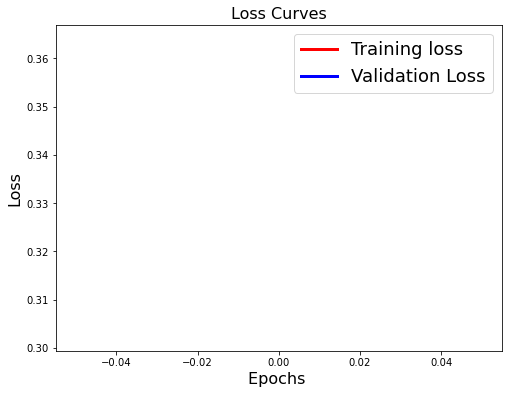

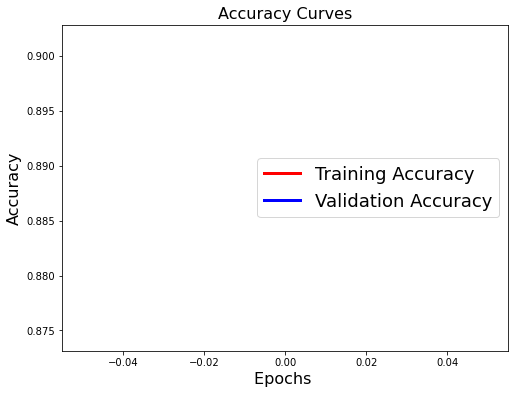

In [73]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

**Test the Trained Model on Testing Data: <br/>Testing a single image**

In [8]:
from keras.models import load_model
model = load_model('model/MobileNetV2_Batch128_epochs10_data2k_91acc_Sketch_model.h5')


In [45]:
#canvas code


#making an array of zeroes 
canvas=np.zeros((650,650,3), np.uint8)
#changing the background color to white
canvas.fill(255)
#initializing some global varaibles
x=0
y=0
count=0
sketching=False

In [46]:
# mouse callback function
def sketch(event,current_x,current_y,flags,param):
    global x, y, sketching
#left button pressing event
    if event==cv2.EVENT_LBUTTONDOWN:
        x=current_x
        y=current_y
        sketching=True
#mouse moving event
    elif event==cv2.EVENT_MOUSEMOVE:
        if sketching:
            #9 is pointer color i.e., black
            cv2.line(canvas, (current_x,current_y),(x,y),9,thickness=2)
            x,y=current_x,current_y
#left button releasing event
    elif event==cv2.EVENT_LBUTTONUP:
        sketching=False

In [47]:

cv2.imshow("CV Project->Press 'a' to save image and 'x' to close window", canvas)
#binding mouse with canvas
cv2.setMouseCallback("CV Project->Press 'a' to save image and 'x' to close window",sketch)
#infinite drawing loop
while True:
    cv2.imshow("CV Project->Press 'a' to save image and 'x' to close window", canvas)
    r=str(random.randint(0,99999))
    if cv2.waitKey(33) == ord('a'):
        directory=r'C:\Users\MajidFareed\Downloads\Work\content'
        os.chdir(directory)
        cv2.imwrite('Saved-'+r+'.png',canvas)
    elif cv2.waitKey(27)==ord('x'):
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 63ms/step
Model prediction: candle


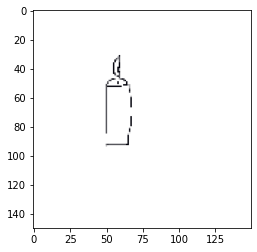

In [48]:
#code for loading and testing the image
img = plt.imread("Saved-92663.png")
img = cv2.resize(img,(150,150))
plt.imshow(img)
img = img/255
img = np.expand_dims(img, axis=0)
prediction = inv_name_mapping_dict[np.argmax(model.predict(img)[0])]
print("Model prediction: {}".format(prediction))


In [10]:
test_single_image(test_img_number=55)

NameError: name 'test_single_image' is not defined